In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
!unzip NewsAggregatorDataset.zip

--2022-12-20 11:50:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29224203 (28M) [application/x-httpd-php]
Saving to: ‘NewsAggregatorDataset.zip’

NewsAggregatorDatas 100%[===================>]  27.87M  34.7MB/s    in 0.8s    

2022-12-20 11:50:21 (34.7 MB/s) - ‘NewsAggregatorDataset.zip’ saved [29224203/29224203]

Archive:  NewsAggregatorDataset.zip
  inflating: 2pageSessions.csv       
   creating: __MACOSX/
  inflating: __MACOSX/._2pageSessions.csv  
  inflating: newsCorpora.csv         
  inflating: __MACOSX/._newsCorpora.csv  
  inflating: readme.txt              
  inflating: __MACOSX/._readme.txt   


In [2]:
# 行数の確認
!wc -l ./newsCorpora.csv

422937 ./newsCorpora.csv


In [3]:
# 先頭10行の確認
!head -10 ./newsCorpora.csv

1	Fed official says weak data caused by weather, should not slow taper	http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss	Los Angeles Times	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.latimes.com	1394470370698
2	Fed's Charles Plosser sees high bar for change in pace of tapering	http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html	Livemint	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.livemint.com	1394470371207
3	US open: Stocks fall after Fed official hints at accelerated tapering	http://www.ifamagazine.com/news/us-open-stocks-fall-after-fed-official-hints-at-accelerated-tapering-294436	IFA Magazine	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.ifamagazine.com	1394470371550
4	Fed risks falling 'behind the curve', Charles Plosser says	http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430	IFA Magazine	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www

In [4]:
# 読込時のエラー回避のためダブルクォーテーションをシングルクォーテーションに置換
!sed -e 's/"/'\''/g' ./newsCorpora.csv > ./newsCorpora_re.csv

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# データの読込
df = pd.read_csv('./newsCorpora_re.csv', header=None, sep='\t', names=['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'])

# データの抽出
df = df.loc[df['PUBLISHER'].isin(['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']), ['TITLE', 'CATEGORY']]

# データの分割
train, valid_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=123, stratify=df['CATEGORY'])
valid, test = train_test_split(valid_test, test_size=0.5, shuffle=True, random_state=123, stratify=valid_test['CATEGORY'])

# データの保存
train.to_csv('./train.txt', sep='\t', index=False)
valid.to_csv('./valid.txt', sep='\t', index=False)
test.to_csv('./test.txt', sep='\t', index=False)

# 事例数の確認
print('【学習データ】')
print(train['CATEGORY'].value_counts())
print('【検証データ】')
print(valid['CATEGORY'].value_counts())
print('【評価データ】')
print(test['CATEGORY'].value_counts())

【学習データ】
b    4501
e    4235
t    1220
m     728
Name: CATEGORY, dtype: int64
【検証データ】
b    563
e    529
t    153
m     91
Name: CATEGORY, dtype: int64
【評価データ】
b    563
e    530
t    152
m     91
Name: CATEGORY, dtype: int64


1.	关于数据预处理，这些方法是固定的吗
并不是，这要看训练数据的侧重点是什么，比如说训练有关手机号，或者邮件地址那么，数字就显得很重要。如果训练一些品牌的或者地点的名字，那么就不能转换大小写。也还有一些其他的预处理步骤，比如说将has，had转换为have，因为他们的意思相同。


In [6]:
#不用
import string
import re

def preprocessing(text):
  table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
  text = text.translate(table)  # 記号をスペースに置換
  text = text.lower()  # 小文字化
  text = re.sub('[0-9]+', '0', text)  # 数字列を0に置換 数字の正規化

  return text

# データの再結合
df = pd.concat([train, valid, test], axis=0)
df.reset_index(drop=True, inplace=True)  # indexを振りなおす

# 前処理の実施
df['TITLE'] = df['TITLE'].map(lambda x: preprocessing(x))

print(df.head())

                                               TITLE CATEGORY
0  refile update 0 european car sales up for sixt...        b
1  amazon plans to fight ftc over mobile app purc...        t
2  kids still get codeine in emergency rooms desp...        m
3  what on earth happened between solange and jay...        e
4  nato missile defense is flight tested over hawaii        b


txt = "Google Runoob Taobao!"
x = "mSa"
y = "eJo"
z = "odnght"   # 设置删除的字符
mytable = txt.maketrans(x, y, z)
print(txt.translate(mytable))

x -- 必需，字符串中要替代的字符组成的字符串。
y -- 可选，相应的映射字符的字符串。
z -- 可选，要删除的字符。

Gle Rub Tobo!

In [7]:
import string
text="12255$$$32^^^1"
table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
text = text.translate(table) 
print(text)

12255   32   1


In [ ]:
import re

text="12255$$$&&*3###2^^^1"
text=re.sub('\W'," ",text)
print(text) 

12255      3   2   1


In [ ]:
!pip install pyenchant

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.0 MB/s 


In [8]:
import numpy as np

train=np.array(train)
valid=np.array(valid)
test=np.array(test)

In [9]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

def preprocessing(data):
 x=[]
 y=[]
 label={"b":0,"e":1,"t":2,"m":3} #字母标签转换成数字标签
 
 for title,category in data:
  title=re.sub('[0-9]+', '', title) #将title中的数字转换成0 I have apples I have 3 apples
  x.append(title.lower())#将title中的字母转换为小写
  y.append(label[category])#字母标签转换成数字标签
 return x,y 

In [10]:
X_train,Y_train=preprocessing(train)#X_....存储title，Y_存储标签
X_valid,Y_valid=preprocessing(valid)
X_test,Y_test=preprocessing(test)


In [11]:
tfidfvectorizer=TfidfVectorizer(min_df=0.001)#定义最小的数据精度，小数点后三位
X_train=tfidfvectorizer.fit_transform(X_train).toarray()#计算每一个词出现的频度，并将频度写入到一个数组当中
X_valid=tfidfvectorizer.transform(X_valid).toarray()
X_test=tfidfvectorizer.transform(X_test).toarray()


必须先用fit_transform(trainData)，之后再transform(testData)
如果直接transform(testData)，程序会报错
如果fit_transfrom(trainData)后，使用fit_transform(testData)而不transform(testData)，虽然也能归一化，但是两个结果不是在同一个“标准”下的，具有明显差异。(一定要避免这种情况)


In [12]:
X_train=pd.DataFrame(X_train,columns=tfidfvectorizer.get_feature_names_out())
X_valid=pd.DataFrame(X_valid,columns=tfidfvectorizer.get_feature_names_out())
X_test=pd.DataFrame(X_test,columns=tfidfvectorizer.get_feature_names_out())

X_train.to_csv("./X_train.txt",sep="\t",index=False)
X_valid.to_csv("./X_valid.txt",sep="\t",index=False)
X_test.to_csv("./X_test.txt",sep="\t",index=False)

In [13]:
from sklearn.linear_model import LogisticRegression #try to change the model and 

model=LogisticRegression(max_iter=200)
model.fit(X_train,Y_train)#使用train数据集套用逻辑回归模型，训练标签对应


LogisticRegression(max_iter=200)

In [14]:
def score(model,X):
 pred=model.predict(X)
 pred_proba=model.predict_proba(X)
 return pred,pred_proba

In [15]:
X_pred_valid,X_pred_proba_valid=score(model,X_valid)#使用上一题中准备好的逻辑回归预测模型对valid数据集进行预测，
X_pred_test,X_pred_proba_test=score(model,X_test)#使用上一题中准备好的逻辑回归预测模型对test数据集进行预测，

print(X_pred_valid,X_pred_proba_valid)

[2 1 0 ... 3 0 1] [[0.03376703 0.00178825 0.9617875  0.00265722]
 [0.03862146 0.94345598 0.01113473 0.00678783]
 [0.80769003 0.11224335 0.01914186 0.06092477]
 ...
 [0.23830148 0.09651982 0.08157934 0.58359937]
 [0.72626659 0.12351524 0.07124493 0.07897325]
 [0.32043498 0.55489559 0.0899368  0.03473264]]


2.	关于预测结果，出现偏差的原因是什么，改进方法是什么呢
数据不平衡导致的结果不准确，关于这个问题只能通过改变训练模型的方式进行提升，但是意义不大。。。


In [16]:
from sklearn.metrics import accuracy_score
 
print(f"valid_accuracy：{accuracy_score(Y_valid, X_pred_valid)}")#调用accuracy_score函数直接计算预测结果准确率
print(f"valid_accuracy：{accuracy_score(Y_test, X_pred_test)}")

valid_accuracy：0.8720059880239521
valid_accuracy：0.8839820359281437


In [17]:

from sklearn.metrics import confusion_matrix
 
print(f"confusion matrix of X_pred_valid：\n{confusion_matrix(Y_valid, X_pred_valid)}\n")
print(f"confusion matrix of X_pred_test：：\n{confusion_matrix(Y_test, X_pred_test)}")

confusion matrix of X_pred_valid：
[[515  33  13   2]
 [ 13 510   3   3]
 [ 26  28  97   2]
 [ 17  26   5  43]]

confusion matrix of X_pred_test：：
[[526  21  14   2]
 [ 11 516   2   1]
 [ 36  25  90   1]
 [ 12  29   1  49]]


混淆矩阵也称误差矩阵，是表示精度评价的一种标准格式，用n行n列的矩阵形式来表示。具体评价指标有总体精度、制图精度、用户精度等，这些精度指标从不同的侧面反映了图像分类的精度。 在人工智能中，混淆矩阵(confusion matrix)是可视化工具，特别用于监督学习，在无监督学习一般叫做匹配矩阵。在图像精度评价中，主要用于比较分类结果和实际测得值，可以把分类结果的精度显示在一个混淆矩阵里面。混淆矩阵是通过将每个实测像元的位置和分类与分类图像中的相应位置和分类相比较计算的。

混淆矩阵的每一列代表了预测类别，每一列的总数表示预测为该类别的数据的数目;每一行代表了数据的真实归属类别，每一行的数据总数表示该类别的数据实例的数目。每一列中的数值表示真实数据被预测为该类的数目:第一行第一列中的43表示有43个实际归属第一类的实例被预测为第一类，同理，第一行第二列的2表示有2个实际归属为第一类的实例被错误预测为第二类。
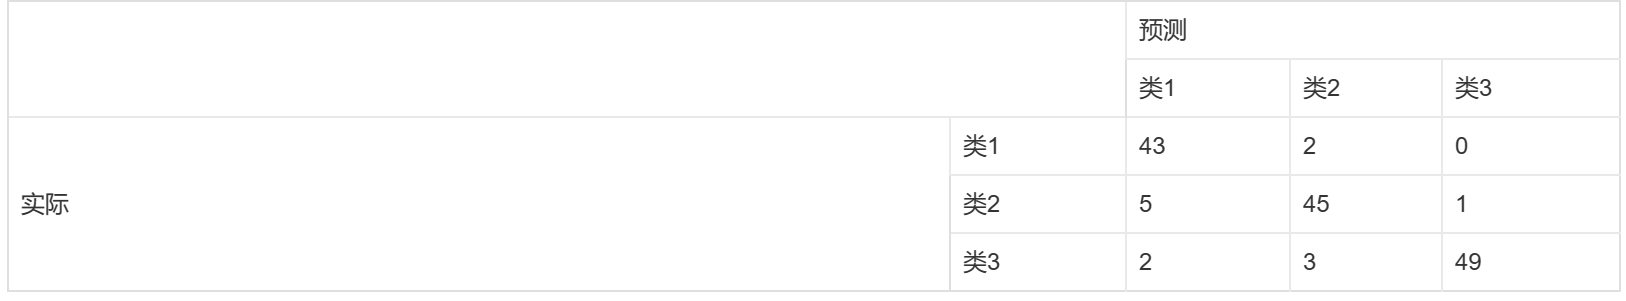

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score
 
def metrics(y_data, y_pred, ave=None):
  precision = precision_score(y_data, y_pred, average=ave)
  recall = recall_score(y_data, y_pred, average=ave)
  F1_score = f1_score(y_data, y_pred, average=ave)
  result = "Precision：{}\nRecall ：{}\nF1_score：{}\n".format(precision, recall, F1_score)
  return result

print(f"【Category order】{model.classes_}\n\n{metrics(Y_test, X_pred_test)}")
print("【micro-average】\n", metrics(Y_valid, X_pred_valid, "macro"))
print("【macro-average】\n", metrics(Y_test, X_pred_test, "micro"))  

【Category order】[0 1 2 3]

Precision：[0.8991453  0.87309645 0.8411215  0.9245283 ]
Recall ：[0.93428064 0.97358491 0.59210526 0.53846154]
F1_score：[0.91637631 0.9206066  0.69498069 0.68055556]

【micro-average】
 Precision：0.8595579249806574
Recall ：0.746335006897495
F1_score：0.784986733697868

【macro-average】
 Precision：0.8839820359281437
Recall ：0.8839820359281437
F1_score：0.8839820359281436



In [19]:
import numpy as np

features = X_train.columns.values
for c, coef in zip(model.classes_, model.coef_):
  top_10 = pd.DataFrame(features[np.argsort(-coef)[:10]], columns=[f"Feature weights 10 most important（class：{c}）"], index=[i for i in range(1, 11)])
  worst_10 = pd.DataFrame(features[np.argsort(coef)[:10]], columns=[f"Feature weights 10 least important（class：{c}）"], index=[i for i in range(1, 11)])
  print( top_10, "\n"),
  print(worst_10, "\n", "-"*70)

   Feature weights 10 most important（class：0）
1                                        bank
2                                      stocks
3                                         fed
4                                         ecb
5                                       china
6                                        euro
7                                   obamacare
8                                         oil
9                                      yellen
10                                    ukraine 

   Feature weights 10 least important（class：0）
1                                        video
2                                          she
3                                        ebola
4                                          her
5                                          the
6                                    microsoft
7                                         star
8                                        virus
9                                        apple
10                    

DataFrame 是一个表格型的数据结构，它含有一组有序的列，每列可以是不同的值类型（数值、字符串、布尔型值）。DataFrame 既有行索引也有列索引，它可以被看做由 Series 组成的字典（共同用一个索引）。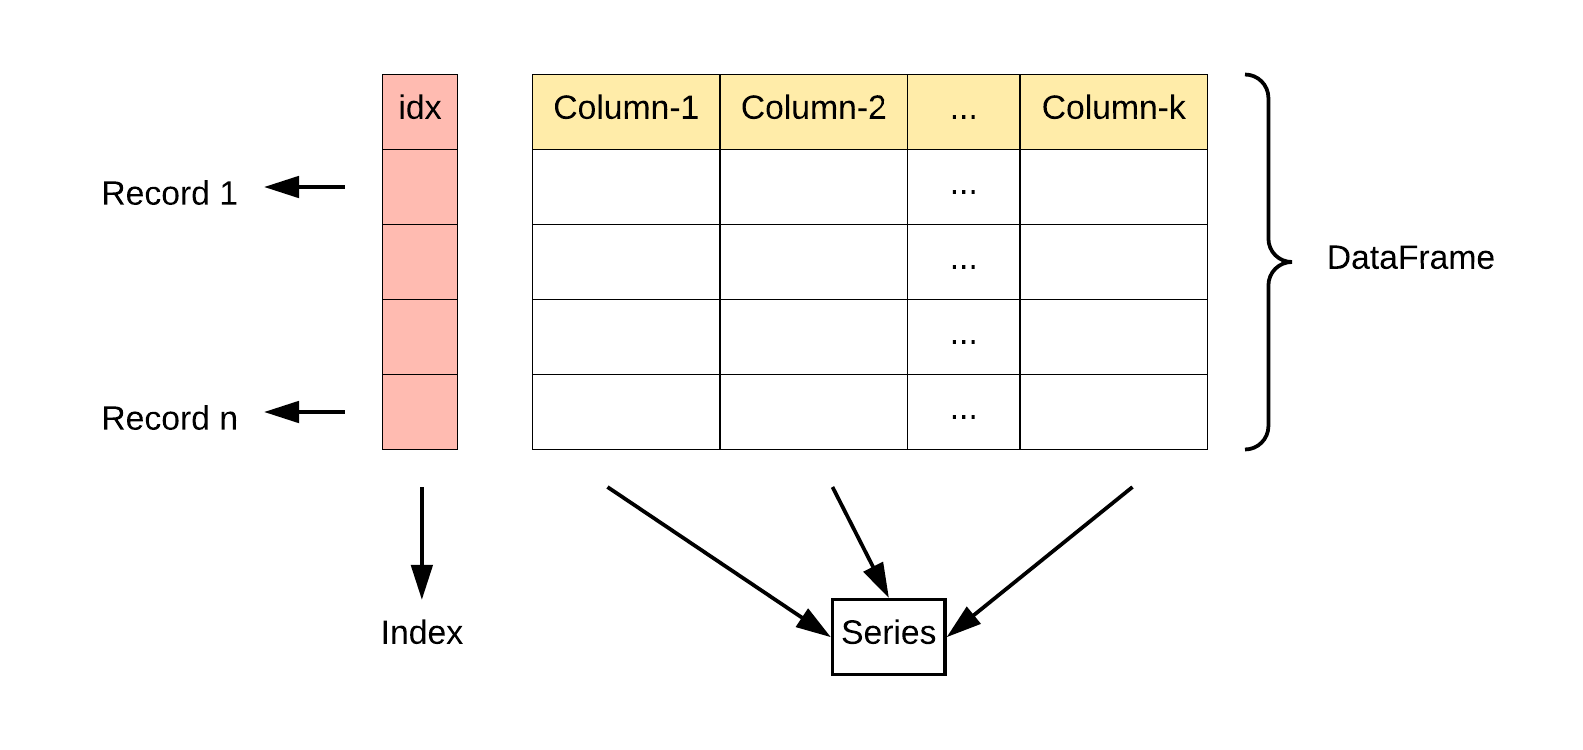

【正則化パラメータ：0.001】

train_accuracy：0.5057094721078248
valid_accuracy：0.5029940119760479
test_accuracy：0.5082335329341318

【正則化パラメータ：0.025750000000000002】

train_accuracy：0.7686259827779858
valid_accuracy：0.7634730538922155
test_accuracy：0.7687125748502994

【正則化パラメータ：0.0505】

train_accuracy：0.7760202171471359
valid_accuracy：0.7672155688622755
test_accuracy：0.7754491017964071

【正則化パラメータ：0.07525000000000001】

train_accuracy：0.7909022837888431
valid_accuracy：0.782185628742515
test_accuracy：0.7859281437125748

【正則化パラメータ：0.1】

train_accuracy：0.8076563084986896
valid_accuracy：0.7971556886227545
test_accuracy：0.7994011976047904



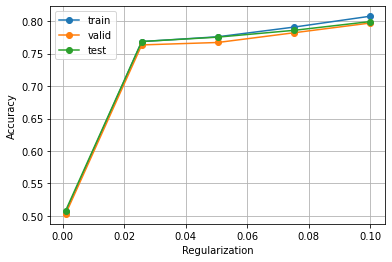

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
 
#モデル構築、学習（関数）
def LR_model_fit(x_data, y_data, c):
  model = LogisticRegression(C=c)#c：正则化系数λ的倒数，float类型，默认为1.0。必须是正浮点型数。像SVM一样，越小的数值表示越强的正则化。
  model.fit(x_data, y_data) 
  return model
 
#学習済みモデルを用いて予測する（関数）
def LR_pred(x_data, y_data, model):
  Y_pred_data = model.predict(x_data)
  accuracy = accuracy_score(Y_pred_data, y_data)
  return accuracy
 
train_acc = []
valid_acc = []
test_acc = []
 
#正則化パラメータ
c_list = np.linspace(0.001, 0.1, 5)#c_listは等差数列です[0.001   0.02575 0.0505  0.07525 0.1   ]
 
for c in c_list:#尝试不同的正则化参数
  model = LR_model_fit(X_train, Y_train, c)
  pre_train = LR_pred(X_train, Y_train, model)
  pre_valid = LR_pred(X_valid, Y_valid, model)
  pre_test = LR_pred(X_test, Y_test, model)
 
  train_acc.append(pre_train)
  valid_acc.append(pre_valid)
  test_acc.append(pre_test)
 
  print(f"【正則化パラメータ：{c}】\n")
  print(f"train_accuracy：{pre_train}")
  print(f"valid_accuracy：{pre_valid}")
  print(f"test_accuracy：{pre_test}\n")
 
#可視化
plt.plot(c_list, train_acc, label="train", marker="o")
plt.plot(c_list, valid_acc, label="valid", marker="o")
plt.plot(c_list, test_acc, label="test", marker="o")
 
plt.legend()
plt.grid(True)
plt.xlabel("Regularization")
plt.ylabel("Accuracy")
plt.show()

In [ ]:

from sklearn.model_selection import GridSearchCV
 
params = {"C": [0.001, 0.005, 10]}
 
# グリッドサーチを行う
gs_model = GridSearchCV(LogisticRegression(max_iter=1500),params, cv=5, verbose=1)
gs_model.fit(X_train, Y_train)
 
#最適なモデルを取得する
best_gs_model = gs_model.best_estimator_
print("\ntrain_score: {:.2%}".format(best_gs_model.score(X_train, Y_train)))
print("valid_score: {:.2%}".format(best_gs_model.score(X_valid, Y_valid)))
print("test_score: {:.2%}".format(best_gs_model.score(X_test, Y_test)))

Fitting 5 folds for each of 3 candidates, totalling 15 fits

train_score: 96.27%
valid_score: 87.87%
test_score: 88.55%
